In [3]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 가설검정 및 통계 분석 패키지
from scipy import stats

# 선형모델 formula ( y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from statsmodels.api import qqplot, add_constant

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scale변환 -> 표준화 회귀계수 산출
## coefficient를 표준화해서 비교해본다.
from sklearn.preprocessing import StandardScaler

# grhpviz
from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV


# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline

matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

## Regression 실습_FAT예측

### 1) 데이터 구성

In [10]:
df_raw = pd.read_csv("./Data/체질검사.csv", engine="python")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [13]:
# 단위 조절
df_raw["WEIGHT"] = df_raw["WEIGHT"]*0.45
df_raw["HEIGHT"] = df_raw["HEIGHT"]*2.54

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,73.537875,183.515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,34.020000,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,35.994375,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,29.919375,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,44.347500,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [25]:
## BMI 생성
df_raw["BMI"] = df_raw["WEIGHT"] / (df_raw["HEIGHT"]**2)*10**4

In [28]:
df_raw.tail()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
247,31.9,74,42.018750,177.80,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9,13.291672
248,23.6,43,34.576875,171.45,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8,11.762801
249,20.9,35,32.956875,167.64,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9,11.727102
250,17.0,56,33.969375,173.99,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0,11.221192
251,17.7,42,34.020000,181.61,36.5,92.0,89.7,101.0,62.3,38.0,22.3,30.8,27.8,16.9,10.314657


### 2) 변수 간 경향성 파악

In [29]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
 14  BMI      252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


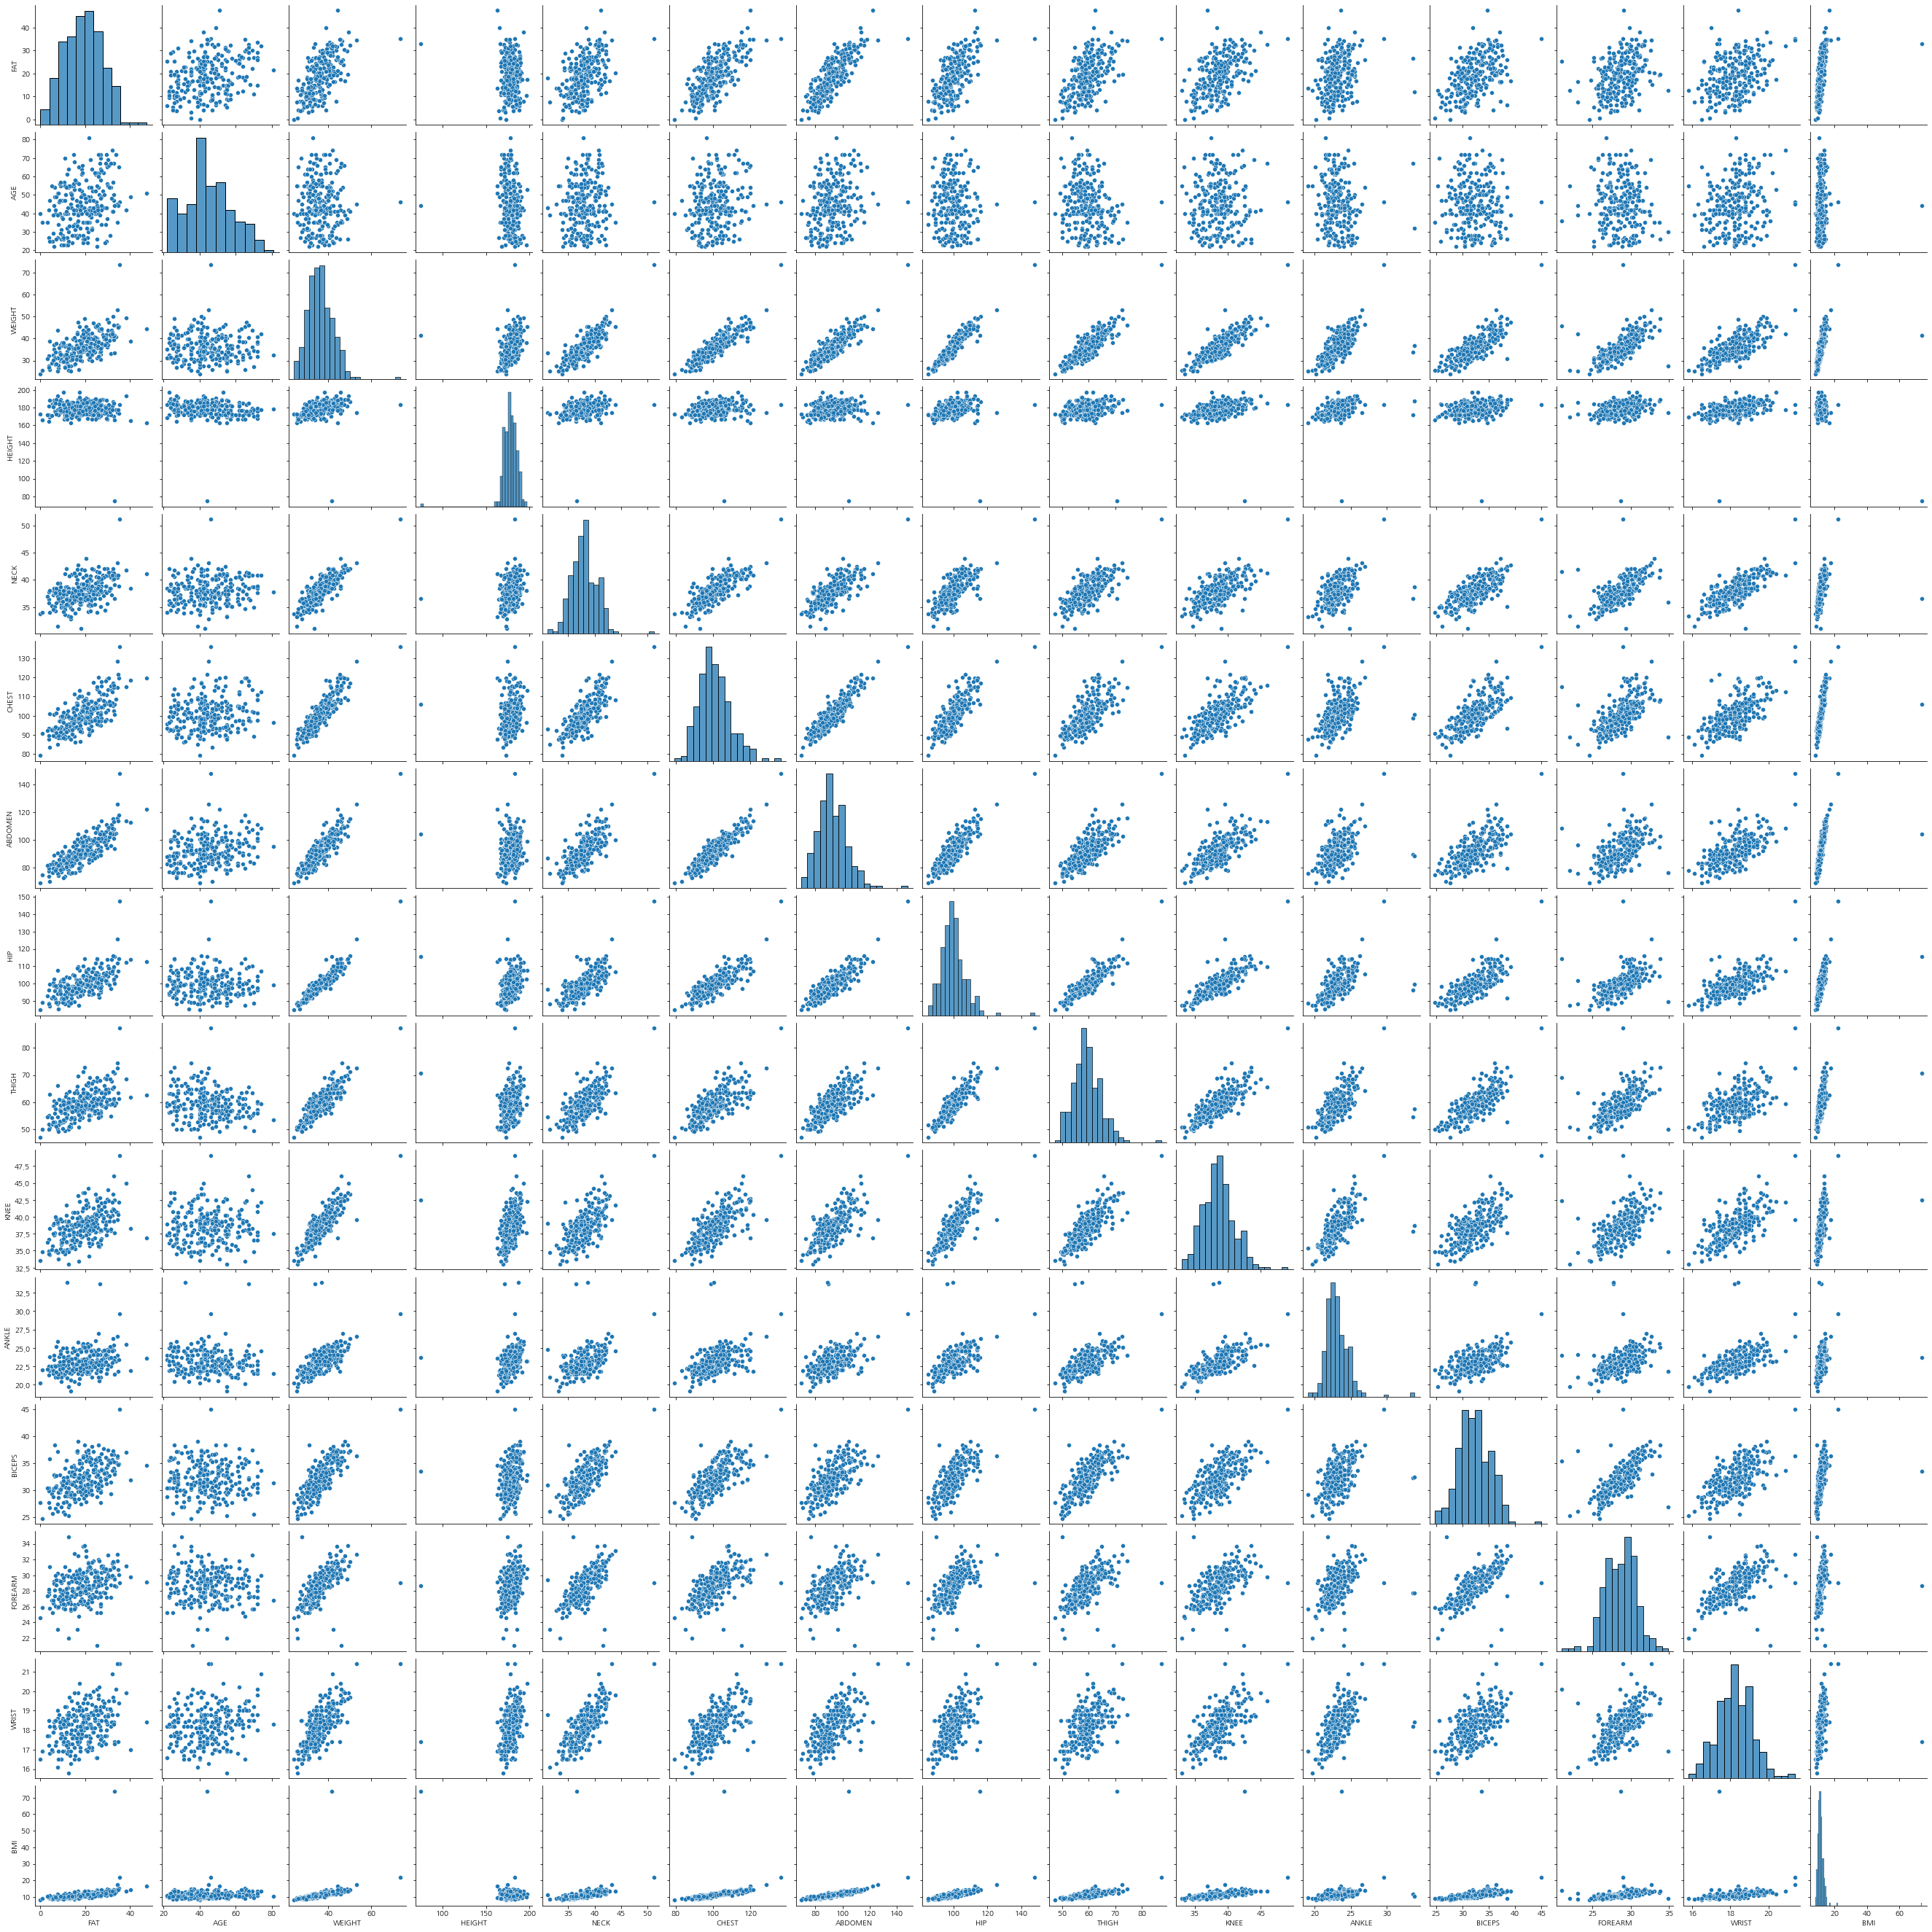

In [30]:
sns.pairplot(df_raw)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,73.537875,183.515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,34.020000,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,35.994375,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,29.919375,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,44.347500,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


- 만약 관계가 있다고 판단되면 여러 개의 변수를 빼서 scatterplot을 그릴 수 있다.

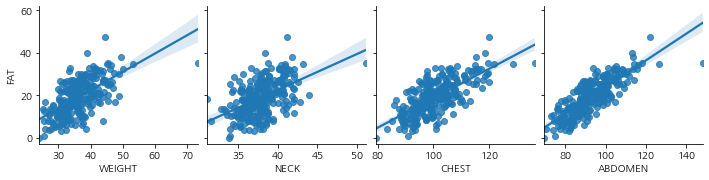

In [33]:
# 4변수가 FAT변수와 상관관계가 있어보인다.
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK",
                                           "CHEST", "ABDOMEN"],kind="reg", diag_kind = None)

In [31]:
# scatterplot에서 본 관계를 정량화
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


- 상관관계를 보면 FAT과 위에서 나열했던 변수 4개(WEIGHT, NECK, CHEST, ABDOMEN)이 연관이 있어보인다.

### 3) 회귀모델 생성

In [34]:
df_raw_y = df_raw["FAT"]
df_raw_X = df_raw.drop("FAT", axis = 1, inplace = False)
str_list = " + ".join(df_raw_X.columns)

In [35]:
formula = "FAT ~ " + str_list
reg_model = smf.ols(formula, data = df_raw)

# 모델(피팅 진행)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           5.49e-63
Time:                        22:17:09   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2460     24.500     -0.990      0.3

- 절편의 p-value는 신경쓰지 않는다.


- 다중선형회귀에서는 Adj, R-squared로 봐야 한다.
- F-통계량값이 50 정도 되기 때문에 p-value는 거의 0에 가깝다. 따라서 모델이 적합하다.
- H1은 '회귀계수들이 적어도 하나는 0가 아니다.' 따라서 모델이 적합하다.


- Prob(Omnibus): 정규성 검정 검증, 0.118므로 귀무가설 채택(정규성이다)
- Durbin-Watson: 독립성에 관한 값 


- P >|t|: t통계량을 기준으로 한 p-value값. 작을 수록 영향을 미친다. 
- 0.05보다 크면 영향을 미치지 않는다고 판단한다. 하지만 p-value만 보고 판단할 수 없다.
- 따라서 변수제거법이나, 다중공선성 등을 확인해야 한다.

- HEIGHT, CHEST, KNEE, BDOMEN, BMI 등 p-value가 높게 형성된 설명변수가 있어 보인다. 따라서 다중공선성을 확인 후에 변수를 줄여주는 작업이 필요하다.

### 4) 다중 공선성 제거

In [36]:
# statsmodels의 상수항 추가 함수
df_raw_x_const = add_constant(df_raw_X)

# DataFrame으로 저장
df_vif = pd. DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) \
                 for i in range(df_raw_x_const.shape[1])]

# VIF정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


※ 몸무게가 52.665, 엉덩이 둘레가 14.890으로 높게 나타난다. 변수 특성과 영향을 고려해 WEIGHT를 모델에서 제외해보도록 하겠다.

In [37]:
# WEIGHT 값 제거
formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP \
            + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI"
reg_model = smf.ols(formula, data = df_raw)

# 모델(적합)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     53.97
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           2.29e-63
Time:                        22:22:46   Log-Likelihood:                -719.42
No. Observations:                 252   AIC:                             1467.
Df Residuals:                     238   BIC:                             1516.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6651      8.839      1.207      0.2

- 정확도는 0.001정도 줄어들었으나 위에서 높게 나왔던 변수들의 p-value가조금은 조정된 듯 보인다.
- 다시 한 번 WEIGHT를 뺀 모델의 VIF를 확인한다.

In [38]:
# 설명변수 데이터 생성 (독립변수 제외)
df_raw_x = df_raw.drop(["FAT", "WEIGHT"], axis = 1)

# statsmodels의 상수항 추가 함수
df_raw_x_const = add_constant(df_raw_x)

# DataFrame으로 저장
df_vif = pd. DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

# VIF정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
9,ANKLE,1.847
11,FOREARM,2.196
1,AGE,2.196
12,WRIST,3.327
10,BICEPS,3.507
3,NECK,3.962
2,HEIGHT,4.665
13,BMI,4.729
8,KNEE,4.788
7,THIGH,7.837


- 다중공선성이 전체적으로 조금씩 줄긴 하였으나 아직까지 높은 변수들이 남아있는 듯 하다.
- 하지만 ABDOMEN과 HIP의 경우 비만을 측정하는데 중요한 요소라고 생각해 변수를 뺄 수 없어 보인다.

### 5) 후진제거법(RFE)
- 앞서 다중공선성과 p-value를 확인해서 변수를 제거하고자 했지만, 중요하다고 생각한 변수들의 p-value나 공선성이 별로 좋게 나온 거 같지 않아 후진 제거법으로 변수들을 줄여보고자 함.

In [42]:
# 목표변수 분리
df_raw_y = df_raw["FAT"]

#sklearn의 선형회귀모델
model = LinearRegression()

# n_features_to_select는 y에 영향을 주는 설명변수의 개수 7개 설정 (BMI 포함)
rfe = RFE(estimator=model, n_features_to_select = 7).fit(df_raw_x, df_raw_y)

#선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))

Selected Variables: Index(['NECK', 'ABDOMEN', 'HIP', 'THIGH', 'FOREARM', 'WRIST', 'BMI'], dtype='object')
Removed Variables: Index(['AGE', 'HEIGHT', 'CHEST', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [43]:
" + ".join(selected_cols)

Index(['NECK', 'ABDOMEN', 'HIP', 'THIGH', 'FOREARM', 'WRIST', 'BMI'], dtype='object')

In [44]:
rfe_reg_model = smf.ols(formula = "FAT ~ " + " + ".join(selected_cols), \
                       data = df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     96.66
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           1.06e-66
Time:                        22:28:59   Log-Likelihood:                -725.14
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     244   BIC:                             1495.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7213      6.341      0.745      0.4

In [45]:
## 다중공선성 확인

# 설명변수 데이터 생성 (독립변수 제외)
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

# DataFrame으로 저장
df_rfe_vif = pd. DataFrame()
df_rfe_vif["variable"] = df_raw_x_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_x_rfe_const.values, i) for i in range(df_raw_x_rfe_const.shape[1])]

# VIF정렬
df_rfe_vif.sort_values("VIF", inplace = True)
df_rfe_vif.round(3)

,variable,VIF
7,BMI,1.315
5,FOREARM,1.840
6,WRIST,2.500
1,NECK,3.656
2,ABDOMEN,4.915
4,THIGH,5.541
3,HIP,9.417
0,const,530.607


- OLS 결과에 R값이  0.727로 변수가 6개 줄었으나 정확도에서는 0.006 정도 차이가 나며, p-value도 일부 변수를 제외하고는 전체적으로 0.05이하로 나타나는 것으로 보였다.
- 또한 다중공선성을 고려했을 때 10이상을 넘는 변수가 없으므로 RFE모델로 뽑은 변수를 활용하고자 한다.

### 5) 변수 중요도 확인
- 회귀계수의 표준화

<AxesSubplot:>

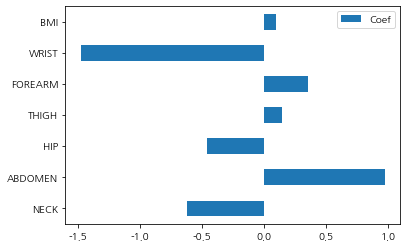

In [47]:
# 설명변수 표준화 전
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, \
                          index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = True)

In [48]:
## 회귀계수의 표준화 진행

# 설명변수 표준화 적용
scaler = StandardScaler()
cols = df_raw_x.columns

np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled["FAT"] = df_raw["FAT"]
reg_model_scaled = smf.ols(formula = "FAT ~ " + " + ".join(selected_cols), data = df_scaled)

reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     96.66
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           1.06e-66
Time:                        22:36:24   Log-Likelihood:                -725.14
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     244   BIC:                             1495.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.275     69.570      0.0

<AxesSubplot:>

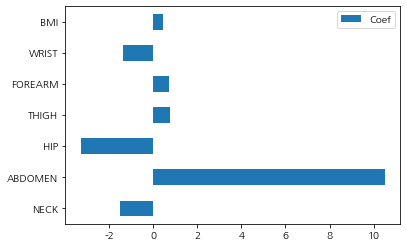

In [50]:
# 설명변수 중요도(표준화 후)
df_reg_coef = pd.DataFrame({"Coef": reg_result_scaled.params.values[1:]}, \
                          index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = True)

## 5) 결론 도출

※ WRIST가 더 높은 coef를 보여줬지만, 단위 표준화 후에는 ABDOMEN이 더 높은 coef를 보여준다.
- 따라서 FAT에 영향을 끼치는 변수를 보면, ABDOMEN과 HIP WRIST, NECK 순으로 영향을 미치는 것으로 보인다.
- BMI 지수의 경우 WEIGHT와 HEIGHT를 통해 만든 변수이기에 RFE방법으로 변수를 선택했을 때 WEIGHT와 HEIGHT 대신 변수로 뽑힌 것으로 봉니다.

### 최종 모델의 회귀식

$$\hat{y} = 19.1508 + 10.5082(ABDOMEN) - 3.2896(HIP) - 1.4904(NECK) - 1.3754(WRIST) + 0.7758(TIGHT) + 0.7254(FOREARM) + 0.4281(BMI)$$
